Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
#Load the data sets- train and test 

In [4]:
df = pd.read_csv("train_titanic.csv")

In [5]:
#Look at top values of train data 

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Print the column names of train data

In [8]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#Print the dimension of train and test data

In [10]:
df.shape

(891, 12)

In [11]:
#Print the number of missing values in each column of train and test data

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

In [13]:
#Barchart of Survived, Pclass, Sex, Embarked

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

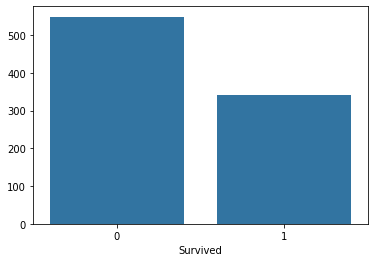

In [14]:
survived = df["Survived"].value_counts()
print(survived)
sns.barplot(x=survived.index, y=survived.values)
#plt.xticks([0,1],["not survied","survied"])


In [15]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
   

<Axes: xlabel='Pclass'>

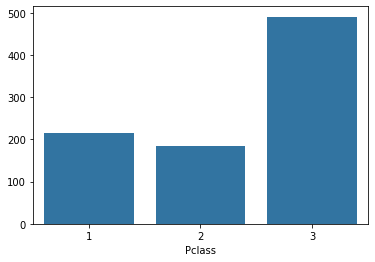

In [16]:
pclass = df["Pclass"].value_counts()
sns.barplot(x=pclass.index, y=pclass.values)



In [17]:
#Histogram of Age, Parch, Fare

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

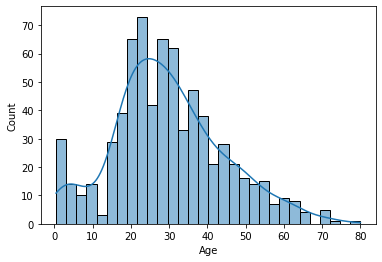

In [18]:
age = df["Age"].value_counts()
print(age)
sns.histplot(df["Age"],kde=True,bins=30)

<Axes: xlabel='Parch', ylabel='Count'>

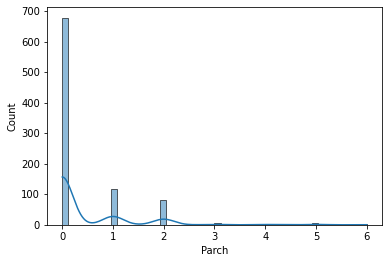

In [19]:
age = df["Parch"].value_counts()
sns.histplot(df["Parch"],kde=True,bins=50)

<Axes: xlabel='Fare', ylabel='Count'>

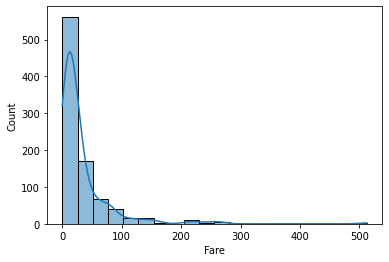

In [20]:
age = df["Fare"].value_counts()
sns.histplot(df["Fare"],kde=True,bins=20)

In [21]:
#Plot histogram of age for survived and did not survived class

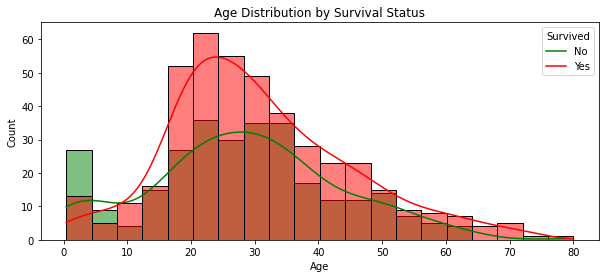

In [22]:
# Drop rows with missing Age values
age_survival = df[["Age", "Survived"]].dropna()

# Plot histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=age_survival, x="Age", hue="Survived", bins=20, kde=True, palette=["red", "green"])

# Add title and axis labels
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


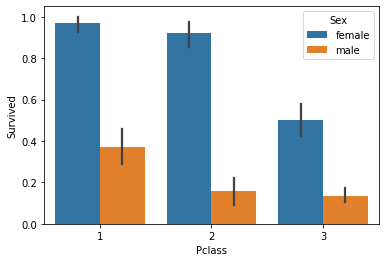

In [23]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

sns.barplot(data=df,x='Pclass',y='Survived',hue='Sex')
plt.show()

<Axes: xlabel='Passenger Class', ylabel='Survival Rate'>

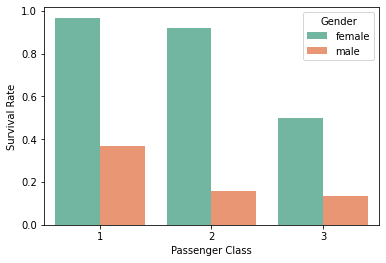

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in relevant columns
Age_wise = df.dropna(subset=['Sex', 'Pclass', 'Survived'])

# Calculate survival rate
survival_rate = Age_wise.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Rename for clarity
survival_rate.columns = ['Passenger Class', 'Gender', 'Survival Rate']


sns.barplot(data=survival_rate, x='Passenger Class', y='Survival Rate', hue='Gender', palette='Set2')



In [25]:
#Age wise Distribution of Male and Female passengers

(0.0, 200.0)

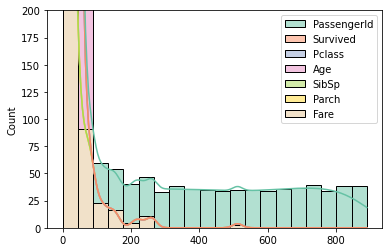

In [26]:
age_wise = df.dropna(subset=['Age', 'Sex'])

# Plot histogram
sns.histplot(data=age_wise, bins=20, kde=True, multiple='stack', palette='Set2')
plt.ylim(0,200)

#

In [27]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [28]:
#Replace the msiing values in Embarked column by 'S'


In [29]:
df["Embarked"].fillna('S',inplace=True)

/tmp/ipykernel_6333/4166613084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna('S',inplace=True)


In [30]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(),inplace=True)

/tmp/ipykernel_6333/3026449597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(),inplace=True)


In [31]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

In [32]:
std = np.std(df['Age'])
mean= np.mean(df["Age"])
n= df["Age"].isna().sum()
random_ages = np.random.normal(loc=mean, scale=std, size=n)
df.loc[df["Age"].isnull(), "Age"] = random_ages
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    25.203266
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

## Feature Engineering - Creating new features

In [33]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

In [34]:
df["FamilySize"]= df["Parch"] + df["SibSp"] +1
df["FamilySize"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [35]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

In [36]:
df["IsAlone"] =df["FamilySize"]==1
df["IsAlone"]

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: IsAlone, Length: 891, dtype: bool

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [37]:
df["Cabin"]= df["Cabin"].isnull()
df["Cabin"]

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [38]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

In [39]:
df=df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


## Model Building

In [40]:
#Prepare X and y

In [41]:
X= df.iloc[:, 1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,22.000000,1,0,7.2500,S,2,False
1,1,female,38.000000,1,0,71.2833,C,2,False
2,3,female,26.000000,0,0,7.9250,S,1,True
3,1,female,35.000000,1,0,53.1000,S,2,False
4,3,male,35.000000,0,0,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,1,True
887,1,female,19.000000,0,0,30.0000,S,1,True
888,3,female,25.203266,1,2,23.4500,S,4,False
889,1,male,26.000000,0,0,30.0000,C,1,True


In [42]:
y= df.iloc[:,0]

In [43]:
# Label encoding of categorical features

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X["Embarked"] = encoder.fit_transform(X["Embarked"])
X["IsAlone"] = encoder.fit_transform(X["IsAlone"])

In [45]:
# concat df_categorical with original df

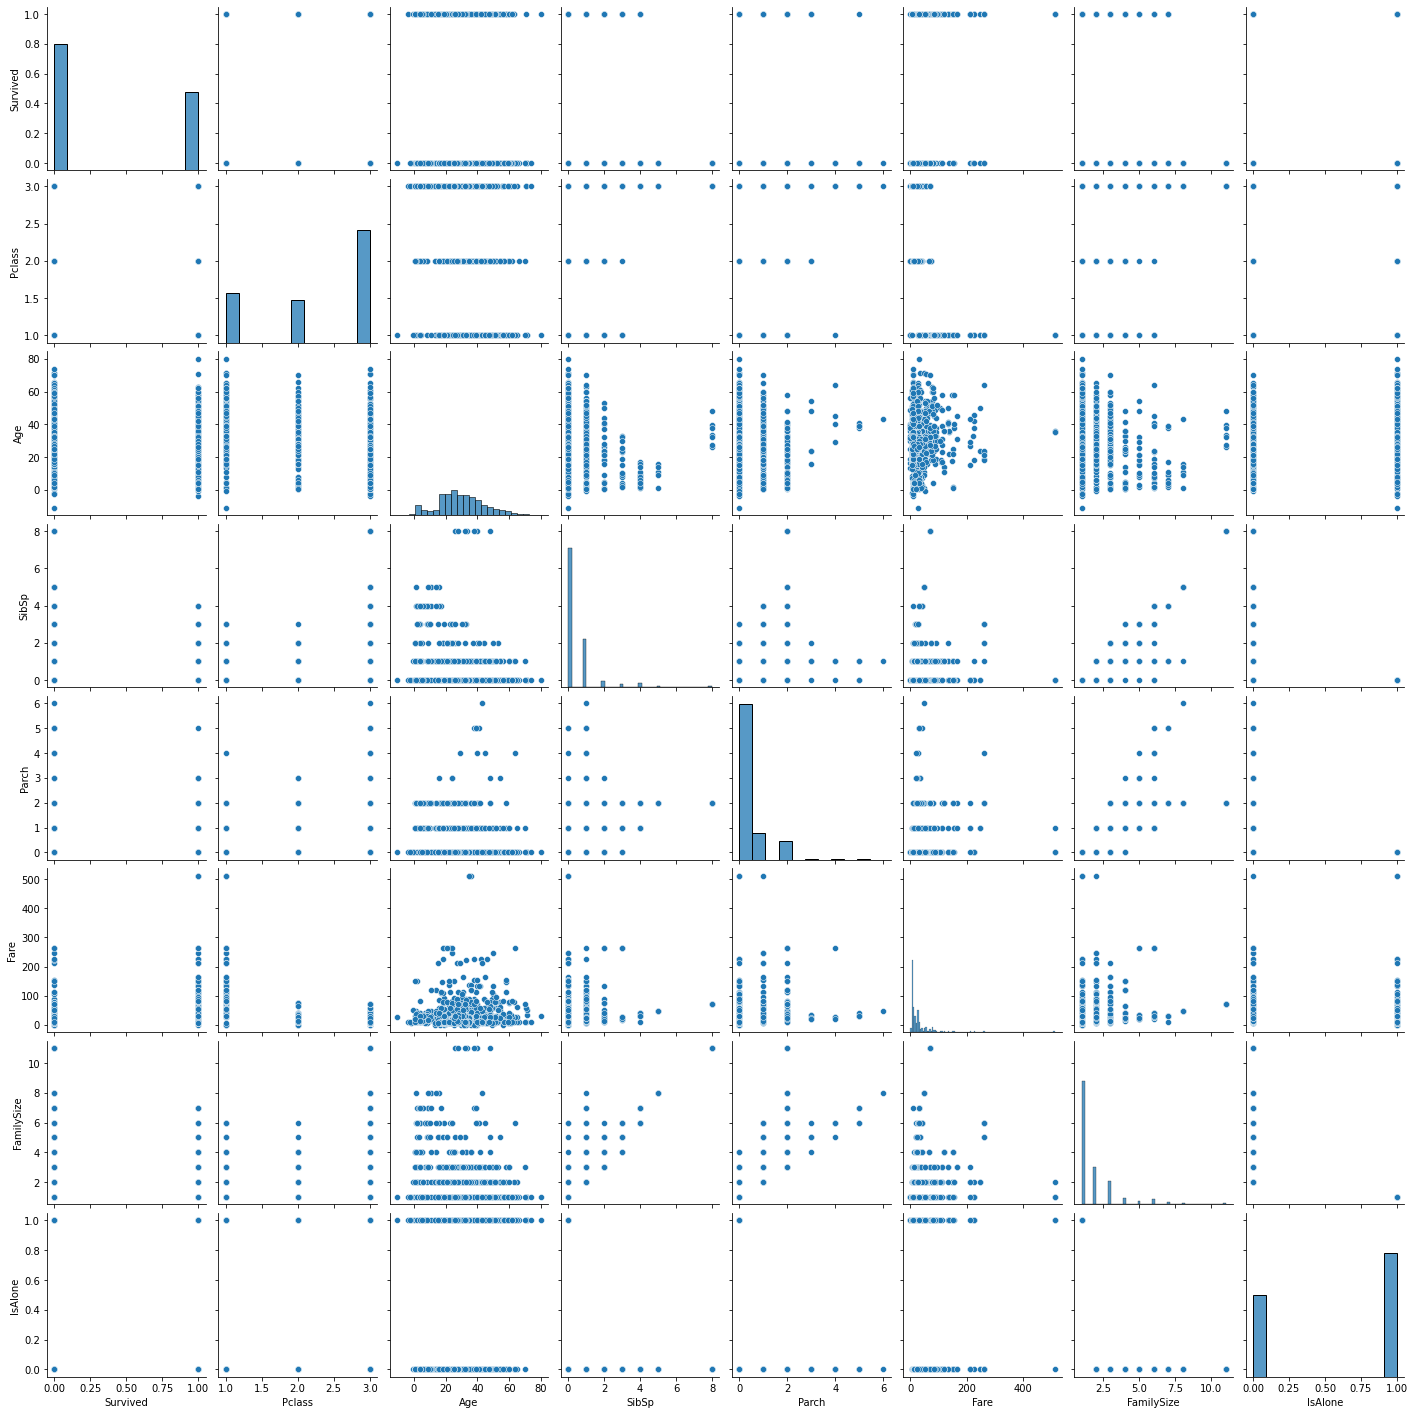

In [46]:
#Do a pairplot of all features
sns.pairplot(df)

In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.000000,1,0,7.2500,2,2,0
1,1,0,38.000000,1,0,71.2833,0,2,0
2,3,0,26.000000,0,0,7.9250,2,1,1
3,1,0,35.000000,1,0,53.1000,2,2,0
4,3,1,35.000000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1
887,1,0,19.000000,0,0,30.0000,2,1,1
888,3,0,25.203266,1,2,23.4500,2,4,0
889,1,1,26.000000,0,0,30.0000,0,1,1


In [48]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [50]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [52]:
#Print the tree

# Importing required packages for visualization


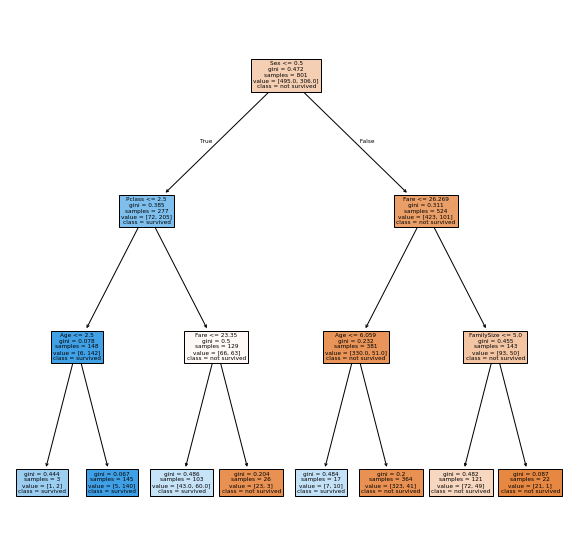

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree,feature_names=X.columns,class_names=["not survived", "survived"],filled=True)
plt.show()

In [54]:
# plotting tree with max_depth=3

<img src="tree2.png">

In [55]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = tree.predict(X_test)

# Compute and print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[46  8]
 [ 8 28]]

Accuracy: 0.8222

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        54
           1       0.78      0.78      0.78        36

    accuracy                           0.82        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



In [57]:
# Printing confusion matrix and accuracy

In [58]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[46  8]
 [ 8 28]]
